<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/Crank_Nicolson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

from tabulate import tabulate #librería para hacer la tabla

In [2]:
def f(x):
    return 1 - 4*(x-0.5)**2

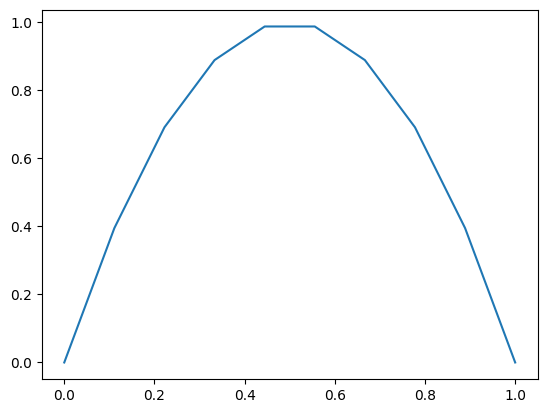

In [3]:
x=np.linspace(0,1,10)
plt.plot(x,f(x)) #Escribir aquí de por  qué es una parábola invertida

In [4]:
def tridiagonal(n, a, b):
  return sp.Matrix([
      [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])

In [5]:
r=1

In [6]:
A = tridiagonal(9, 2 + 2*r, -r)

In [7]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [8]:
B = tridiagonal(9, 2 - 2*r, r)

In [9]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [10]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [11]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [12]:
def crank_nicolson(A, B, b, j):
    b_1 = B*b    # mismo paso inicial de tu función
    S = []       # aquí guardaremos cada solución

    for i in range(j):
        sol = A.LUsolve(b_1)    # u^{n+1}
        S.append(sol.T)         # guardar fila (como vector renglón)
        b_1 = B*sol             # preparar siguiente paso

    # Convertir lista de vectores sympy a una matriz sympy
    return sp.Matrix(S)

In [13]:
j = 50  #Número de pasos en el tiempo

In [14]:
U=crank_nicolson(A, B, b, j)

In [15]:
data = [list(U.row(i)) for i in range(10)]

print(tabulate(data, tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [16]:
U_np = np.array(U.tolist(), dtype=float)

In [17]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.05, j) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

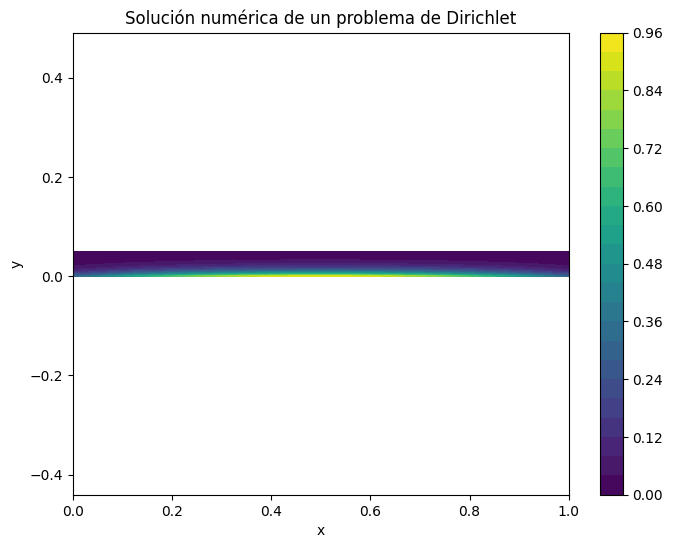

In [18]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [35]:
print("¿X existe?", 'X' in locals())
print("¿Y existe?", 'Y' in locals())
print("¿U_np existe?", 'U_np' in locals())

¿X existe? True
¿Y existe? True
¿U_np existe? True


In [36]:
%matplotlib inline

In [37]:
plt.ion()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

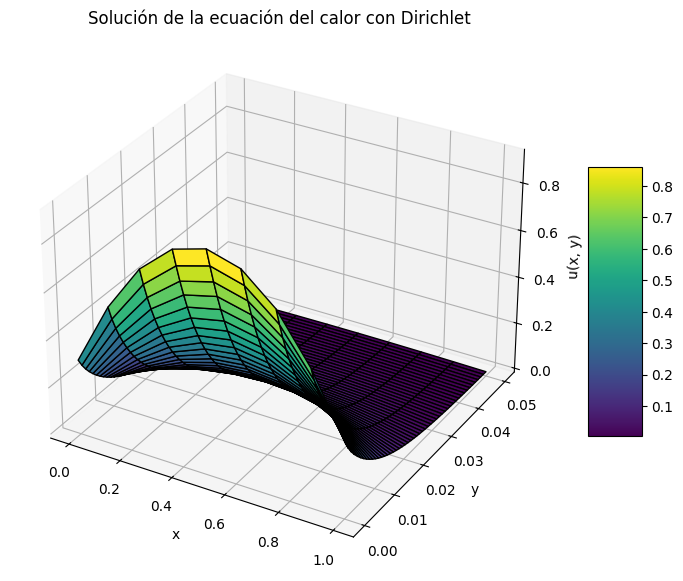

In [38]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()